In [1]:
import sqlite3

In [2]:
import pandas as pd

In [3]:
with sqlite3.connect("../laliga.sqlite") as conn:
    df = pd.read_sql("SELECT * FROM Matches", con = conn)
    

In [4]:
df

,season,division,matchday,date,time,home_team,away_team,score
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2
...,...,...,...,...,...,...,...,...
49015,2021-2022,2,42,5/29/22,None,Real Oviedo,UD Ibiza,None
49016,2021-2022,2,42,5/29/22,None,Real Sociedad B,Real Zaragoza,None
49017,2021-2022,2,42,5/29/22,None,Sporting Gijón,UD Las Palmas,None
49018,2021-2022,2,42,5/29/22,None,CD Tenerife,FC Cartagena,None


In [16]:
def parse_score(score_as_string):
        if score_as_string is None: 
            return None
        home_goals, away_goals = score_as_string.split(":")
        home_goals = int(home_goals)
        away_goals = int(away_goals)
        if home_goals > away_goals: 
            return "1"
        if away_goals > home_goals: 
            return "2" 
        else: 
            return "X"
        

In [17]:
df['result'] = df['score'].apply(parse_score)

<AxesSubplot:ylabel='result'>

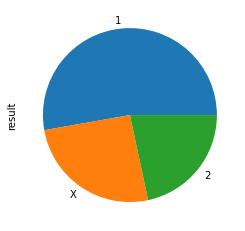

In [18]:
df["result"].value_counts().plot(kind="pie")

In [22]:
df

,season,division,matchday,date,time,home_team,away_team,score,result
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3,2
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2,1
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0,1
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1,X
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2,2
...,...,...,...,...,...,...,...,...,...
49015,2021-2022,2,42,5/29/22,None,Real Oviedo,UD Ibiza,None,None
49016,2021-2022,2,42,5/29/22,None,Real Sociedad B,Real Zaragoza,None,None
49017,2021-2022,2,42,5/29/22,None,Sporting Gijón,UD Las Palmas,None,None
49018,2021-2022,2,42,5/29/22,None,CD Tenerife,FC Cartagena,None,None
